# vechicle_performance

# Using Stochastic Gradient Descent Linear Regression Model

In [1]:
# loading the library

import pandas as pd                                # To work on data manipulation 
import numpy as np                                 # it is used for numerical python
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # to split the data (train and test)
from sklearn.linear_model import SGDRegressor          # to build the model
from sklearn.preprocessing import StandardScaler        # to convert the predictor to the same scale(To scale down the data) 
from sklearn.metrics import mean_squared_error          # to find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# loading the data
df=pd.read_csv('vechicle_performance.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
# see the data
# exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.shape

(398, 9)

In [5]:
# to find the null values in the data
# checking the missing values
df.isnull().sum()     # no missing values in the data


origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [6]:
# working on target variable

# Target variable   [Kilometer_per_liter]

In [7]:
df.Kilometer_per_liter.describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

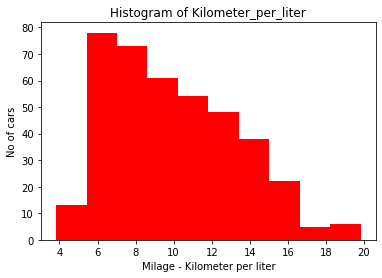

In [8]:
# histogram of the Kilometer_per_liter
plt.hist(df.Kilometer_per_liter,color='red')
plt.xlabel('Milage - Kilometer per liter')
plt.ylabel('No of cars')
plt.title('Histogram of Kilometer_per_liter')
plt.show()

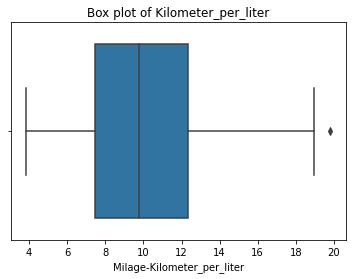

In [9]:
# box plot of Kilometer_per_liter
sns.boxplot(df.Kilometer_per_liter)
plt.xlabel('Milage-Kilometer_per_liter')
plt.title('Box plot of Kilometer_per_liter')
plt.show()

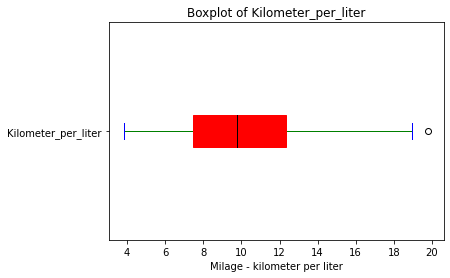

In [10]:
# or you can do the boxplot in different way
props2=dict(boxes='red',whiskers='green',medians='black',caps='blue')
df.Kilometer_per_liter.plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('Milage - kilometer per liter')
plt.title('Boxplot of Kilometer_per_liter')
plt.show()

In [11]:
# How many outliers are present
# checking the outliers
kpl_IQR=df.Kilometer_per_liter.describe()['75%']-df.Kilometer_per_liter.describe()['25%']
print('kpl_IQR =',kpl_IQR)
kpl_uplim=df.Kilometer_per_liter.describe()['75%']+1.5*kpl_IQR
print('kpl_uplim =',kpl_uplim)

kpl_IQR = 4.889152635448127
kpl_uplim = 19.66289646865008


In [12]:
len(df.Kilometer_per_liter[df.Kilometer_per_liter>kpl_uplim])

1

In [13]:
# or you can do in this way
kpl_IQR=df.Kilometer_per_liter.quantile(0.75)-df.Kilometer_per_liter.quantile(0.25)
print('kpl_IQR =',kpl_IQR)
kpl_HE=df.Kilometer_per_liter.quantile(0.75)+(1.5*kpl_IQR)
print('kpl_HE =',kpl_HE)
kpl_LE=df.Kilometer_per_liter.quantile(0.25)-(1.5*kpl_IQR)
print('kpl_LE =',kpl_LE)
len(df.Kilometer_per_liter[df.Kilometer_per_liter>kpl_HE])

kpl_IQR = 4.889152635448127
kpl_HE = 19.66289646865008
kpl_LE = 0.10628592685756999


1

## Their is only one outliers present in the data so we are ignoring it

# Origin  (its a categorical variable)

In [14]:
# 2___origin -------
# country origin (given numbers only)
df.origin.value_counts()    # thier are only 3 countries with counts

1    249
3     79
2     70
Name: origin, dtype: int64

In [15]:
df.origin.value_counts().sum()

398

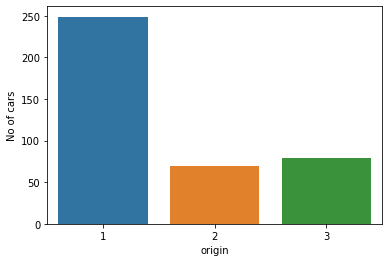

In [16]:
# barplot
sns.countplot(df.origin)
plt.ylabel('No of cars')
plt.show()

In [17]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

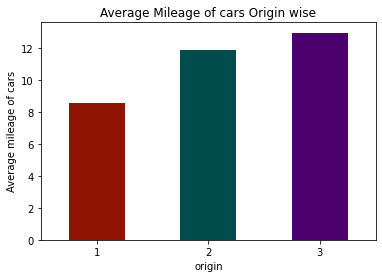

In [18]:
# Kilometer_per_liter (mileage) vs origin

df.groupby('origin')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Average mileage of cars')
plt.xticks(rotation=0)
plt.title('Average Mileage of cars Origin wise')
plt.show()

In [19]:
# if you want to print the numbers you can print 
df.groupby('origin')['Kilometer_per_liter'].mean()

origin
1     8.538388
2    11.857865
3    12.945895
Name: Kilometer_per_liter, dtype: float64

In [20]:
# the above graph is saying that the average mileage of cars in country(1) is 8.5,the average mileage of cars in country(2) is 11.85,the average mileage of cars country(3) is 12.9 

# Cylinder   (its a categorical variable)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [22]:
# 3 cylinders -------
# no of cylinders
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [23]:
df.cylinders.value_counts().sum()

398

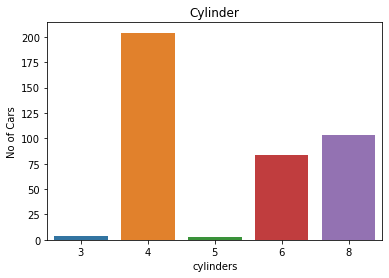

In [24]:
# Barplot
sns.countplot(df.cylinders)
plt.ylabel('No of Cars')
plt.title('Cylinder')
plt.show()

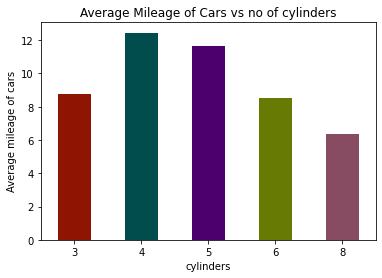

In [25]:
# Kilometer_per_liter (mileage) vs cylinder

df.groupby('cylinders')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e','#677a04','#874c62'])
plt.ylabel('Average mileage of cars')
plt.xticks(rotation=0)
plt.title('Average Mileage of Cars vs no of cylinders')
plt.show()

In [26]:
df.groupby('cylinders')['Kilometer_per_liter'].mean()

cylinders
3     8.736703
4    12.451084
5    11.634766
6     8.496801
8     6.361471
Name: Kilometer_per_liter, dtype: float64

In [27]:
# the above graph says that the average miliage of cars of 3 cylinders 8.736
# the above graph says that the average miliage of cars of 4 cylinders 12.45
# the above graph says that the average miliage of cars of 5 cylinders 11.63
# the above graph says that the average miliage of cars of 6 cylinders 8.49
# the above graph says that the average miliage of cars of 8 cylinders 6.36

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# displacement

In [29]:
df.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

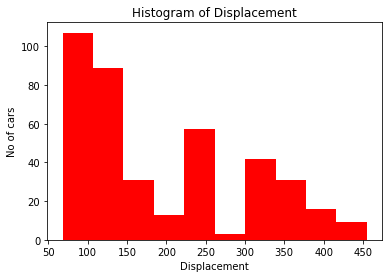

In [30]:
# histogram 
plt.hist(df.displacement,color='red')
plt.xlabel('Displacement')
plt.ylabel('No of cars')
plt.title('Histogram of Displacement')
plt.show()

<AxesSubplot:xlabel='displacement'>

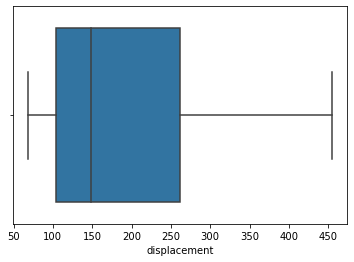

In [31]:
sns.boxplot(df.displacement)

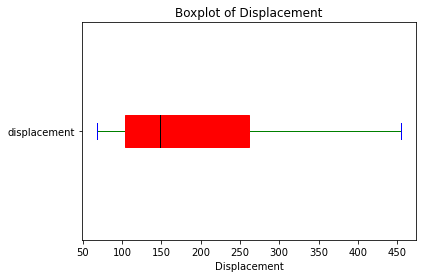

In [32]:
# or you can do the boxplot in this way as well 
df.displacement.plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('Displacement')
plt.title('Boxplot of Displacement')
plt.show()

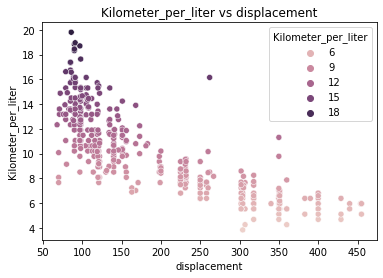

In [33]:
# scatterplot of Kilometer_per_liter vs displacement
sns.scatterplot(x='displacement',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs displacement')
plt.show()

In [34]:
# the plot is telling that if the displacement is high the mileage is very low
# it is negatively correlated 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Horsepower

In [36]:
# converting the data type object to int64
df.horsepower=pd.to_numeric(df.horsepower,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [37]:
# some data points in horsepower variable are '?' they converted to nan when datatype is changed
df.horsepower.isnull().sum()     # their are 6 nan values

6

In [38]:
# removing nan values
df=df.dropna()

In [39]:
df.horsepower.isnull().sum()

0

In [40]:
df.shape

(392, 9)

In [41]:
# distribution in horse power
df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

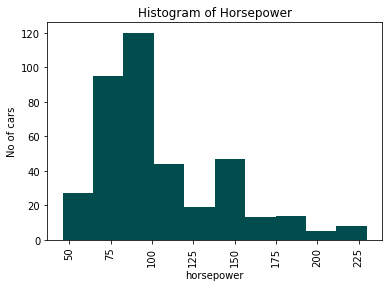

In [42]:
# histogram
plt.hist(df.horsepower,color='#014d4e')
plt.xlabel('horsepower')
plt.xticks(rotation=90)
plt.ylabel('No of cars')
plt.title('Histogram of Horsepower')
plt.show()

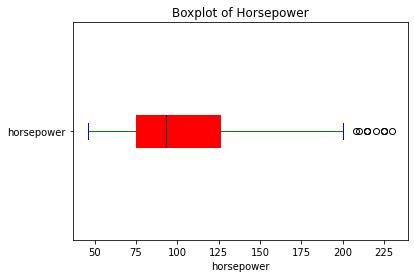

In [43]:
# box plot 
df.horsepower.plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('horsepower')
plt.title('Boxplot of Horsepower')
plt.show()

In [44]:
# checking the outliers
hp_IQR=df.horsepower.describe()['75%']-df.horsepower.describe()['25%']
print('hp_IQR =',hp_IQR)
hp_uplim=df.horsepower.describe()['75%']+1.5*hp_IQR
print('hp_uplim =',hp_uplim)
len(df.horsepower[df.horsepower>hp_uplim])     # their are 10 outliers ignore

hp_IQR = 51.0
hp_uplim = 202.5


10

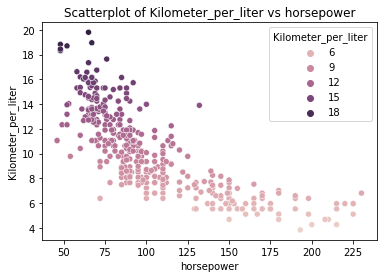

In [45]:
# scatterplot Kilometer_per_liter vs horsepower
sns.scatterplot(x='horsepower',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs horsepower')
plt.show()

# Weight

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [47]:
# checking if their is null values or not
df.weight.isnull().sum()

0

In [48]:
df.weight.value_counts()

1985    4
2130    4
2125    3
2720    3
2945    3
       ..
3102    1
3664    1
2807    1
2660    1
2625    1
Name: weight, Length: 346, dtype: int64

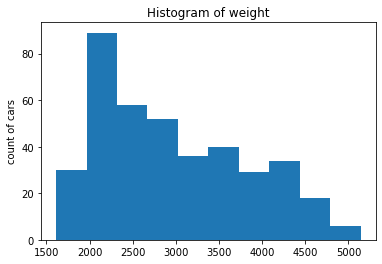

In [49]:
# histogram of weights
plt.hist(df.weight)
plt.title('Histogram of weight')
plt.ylabel('count of cars')
plt.show()

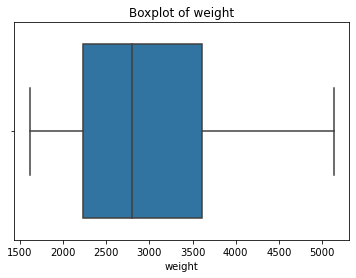

In [50]:
# boxplot
sns.boxplot(df.weight)
plt.title('Boxplot of weight')
plt.show()

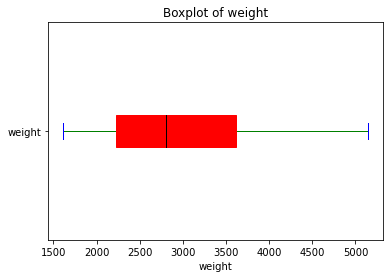

In [51]:
df.weight.plot.box(color=props2,patch_artist=True,vert=False)
plt.title('Boxplot of weight')
plt.xlabel('weight')
plt.show()

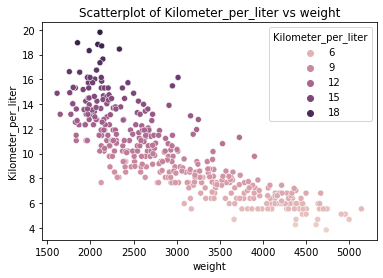

In [52]:
sns.scatterplot(x='weight',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.xlabel('weight')
plt.ylabel('Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs weight')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# Accleration  [continious variable]

In [54]:
df.acceleration.value_counts()

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64

In [55]:
df.acceleration.isnull().sum()      # their is no null values in the data

0

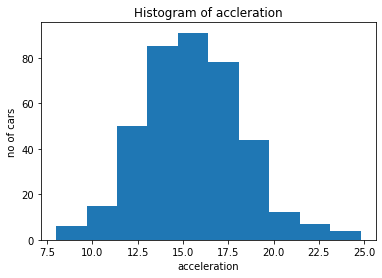

In [56]:
# ploting the histogram 
plt.hist(df.acceleration)
plt.xlabel('acceleration')
plt.ylabel('no of cars')
plt.title('Histogram of accleration')
plt.show()

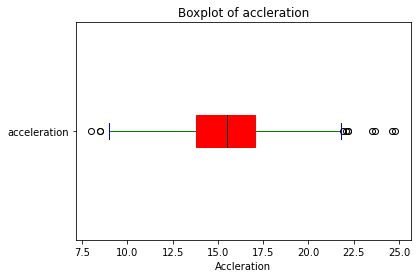

In [57]:
df.acceleration.plot.box(color=props2,patch_artist=True,vert=False)
plt.title('Boxplot of accleration')
plt.xlabel('Accleration')
plt.show()

In [58]:
# their is a outliers 
# checking the outliers
acc_IQR=df.acceleration.describe()['75%']-df.acceleration.describe()['25%']
acc_uplim=df.acceleration.describe()['75%']+(1.5*acc_IQR)
len(df.acceleration[df.acceleration>acc_uplim])

8

In [59]:
acc_lowlim=df.acceleration.describe()['25%']-(1.5*acc_IQR)
len(df.acceleration[df.acceleration<acc_lowlim])

3

In [60]:
# their are 8 and 3 outlers its very low so ignore

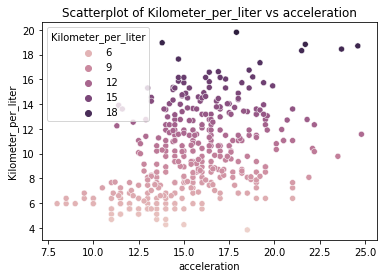

In [61]:
sns.scatterplot(x='acceleration',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs acceleration')
plt.show()

# year

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [63]:
df.year.value_counts()

1973    40
1978    36
1976    34
1975    30
1982    30
1970    29
1979    29
1972    28
1977    28
1981    28
1971    27
1980    27
1974    26
Name: year, dtype: int64

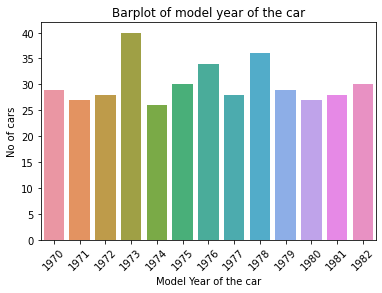

In [64]:
# bar plot
sns.countplot(df.year)
plt.title('Barplot of model year of the car')
plt.xticks(rotation=45)
plt.xlabel('Model Year of the car')
plt.ylabel('No of cars')
plt.show()

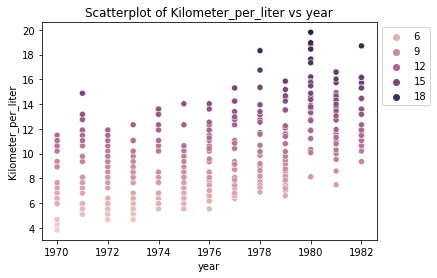

In [65]:
# scatterplot Kilometer_per_liter vs year
sns.scatterplot(x='year',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs year')
plt.legend(bbox_to_anchor=(1,1),loc=2)    # keeping the legend outside the graph
plt.show()

# Name

In [66]:
# car brand and model name (unique for each instance)
df.name.describe()

count             392
unique            301
top       amc matador
freq                5
Name: name, dtype: object

In [67]:
# their are almost all the unique names so it a bad predictor

<AxesSubplot:>

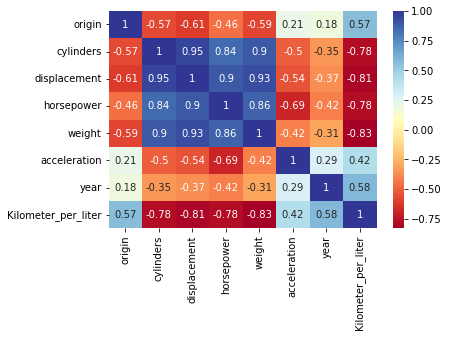

In [68]:
# Heatmap
# to get correlation values on heat map
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')

In [69]:
# correlation of target variable with predictor variables
df.corr()['Kilometer_per_liter']

origin                 0.565209
cylinders             -0.777618
displacement          -0.805127
horsepower            -0.778427
weight                -0.832244
acceleration           0.423329
year                   0.580541
Kilometer_per_liter    1.000000
Name: Kilometer_per_liter, dtype: float64

In [70]:
# dividing the data into predictor variable(x),target variable(y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [71]:
# droping the name because its not a good predictor
df.drop('name',axis=1,inplace=True)

In [72]:
x=df.drop('Kilometer_per_liter',axis=1)
x.head(2)

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970


In [73]:
y=df.iloc[:,7]
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [74]:
# load the library for spliting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=0)

In [75]:
# standardising the data
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [76]:
# dimension of the datasets
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (313, 7)
x_test = (79, 7)
y_train = (313,)
y_test = (79,)


In [77]:
# after standartizing build the model
# building the model
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('R-squared =',score)

R-squared = 0.8136084490482554


In [78]:
# prediction
y_pred=sgdr.predict(x_test)

# evaluating the prediction

from sklearn.metrics import mean_squared_error          # to find the MSE (error)
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 1.843805811826835
RMSE = 1.3578681128249661


## using ols method building the model

In [79]:
# keep only selected columns

In [80]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

In [83]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols  # ordinary least squares
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [84]:
df.shape

(392, 8)

In [86]:
392*0.20

78.4

In [87]:
78-392

-314

In [92]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

In [88]:
# keep predicted with target variable
# spliting the data for train and test
trn=df.iloc[0:314,]
tst=df.iloc[314:,]

In [99]:
# building the model
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model1=smf.ols('Kilometer_per_liter ~origin+cylinders+displacement+horsepower+weight+acceleration+year',data=trn).fit()
print(model1.summary())


                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.817
Method:                  Least Squares   F-statistic:                     200.8
Date:                 Sun, 16 Jan 2022   Prob (F-statistic):          2.19e-110
Time:                         21:28:39   Log-Likelihood:                -503.00
No. Observations:                  314   AIC:                             1022.
Df Residuals:                      306   BIC:                             1052.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -470.1232     50.410    

In [94]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

In [101]:
# if the p-value is greater than 0.05 then remove the variable
model2=smf.ols('Kilometer_per_liter~origin+weight+year',data=trn).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.819
Model:                             OLS   Adj. R-squared:                  0.817
Method:                  Least Squares   F-statistic:                     466.1
Date:                 Sun, 16 Jan 2022   Prob (F-statistic):          1.63e-114
Time:                         21:30:05   Log-Likelihood:                -505.34
No. Observations:                  314   AIC:                             1019.
Df Residuals:                      310   BIC:                             1034.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -471.7209     47.205     -9.99

In [98]:
# the above one is the final data  --- model2 is the winning model

In [102]:
# Make test data in two parts

#make 2parts of test data
# one, only having predictors and another one having only Target variable

In [103]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 316 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               78 non-null     int64  
 1   cylinders            78 non-null     int64  
 2   displacement         78 non-null     float64
 3   horsepower           78 non-null     float64
 4   weight               78 non-null     int64  
 5   acceleration         78 non-null     float64
 6   year                 78 non-null     int64  
 7   Kilometer_per_liter  78 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 5.5 KB


In [104]:
x_tst=tst.iloc[:,tst.columns!='Kilometer_per_liter']   # only the predictor data
y_tst=tst.iloc[:,tst.columns=='Kilometer_per_liter']   # only the target variable

In [105]:
# pr2ediction on test data
pred_1=model2.predict(x_tst)

In [108]:
# residuals
# if you want to find the residuals we want to convert target variable from dataframe to series
y_tst_series=y_tst.iloc[:,0]

In [110]:
# now you can perform the residuals 
residuals=y_tst_series-pred_1
residuals

316   -1.412382
317    1.733068
318    0.828531
319    1.040265
320    3.191360
         ...   
393   -0.037829
394    5.216357
395    0.840194
396   -0.028584
397    1.486304
Length: 78, dtype: float64

In [114]:
# rmse
# finding the square of error
se_1=residuals.pow(2)
# finding the sum of it
sse_1=se_1.sum()
# finding the mean of it
mse=sse_1/len(se_1)
# finding the square root 
import math
rmse=math.sqrt(mse)
rmse

2.248971759180273

In [116]:
len(y_tst_series)

78

In [115]:
# ploting the graph

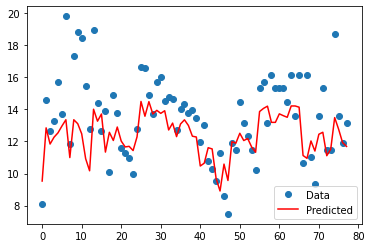

In [118]:
import matplotlib.pyplot as plt
obsno=np.arange(0,78,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_tst_series,'o',label='Data')
ax.plot(obsno,pred_1,'r-',label='Predicted')
ax.legend(loc='best')

In [119]:
# Assemptions to be met in case of ols method

In [159]:
selected_columns=df[['origin','weight','year']]

#  1.Normality
- make histogram of residuals
- and check whether its approximately bell-shaped,symmetrical

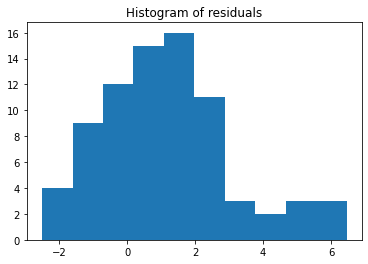

In [122]:
plt.hist(residuals)
plt.title('Histogram of residuals')
plt.show()

<AxesSubplot:ylabel='Density'>

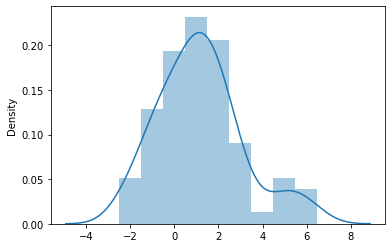

In [123]:
sns.distplot(residuals)

# 2. Linearity 
- make scatter plot
- x=each continious variable one by one 
- y=target variable
- see whether a linear relationship is visible

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.7 KB


In [130]:
# segregrating the numerical variable
a=df.describe(include=['int','float']).columns

In [131]:
da1=df[a]

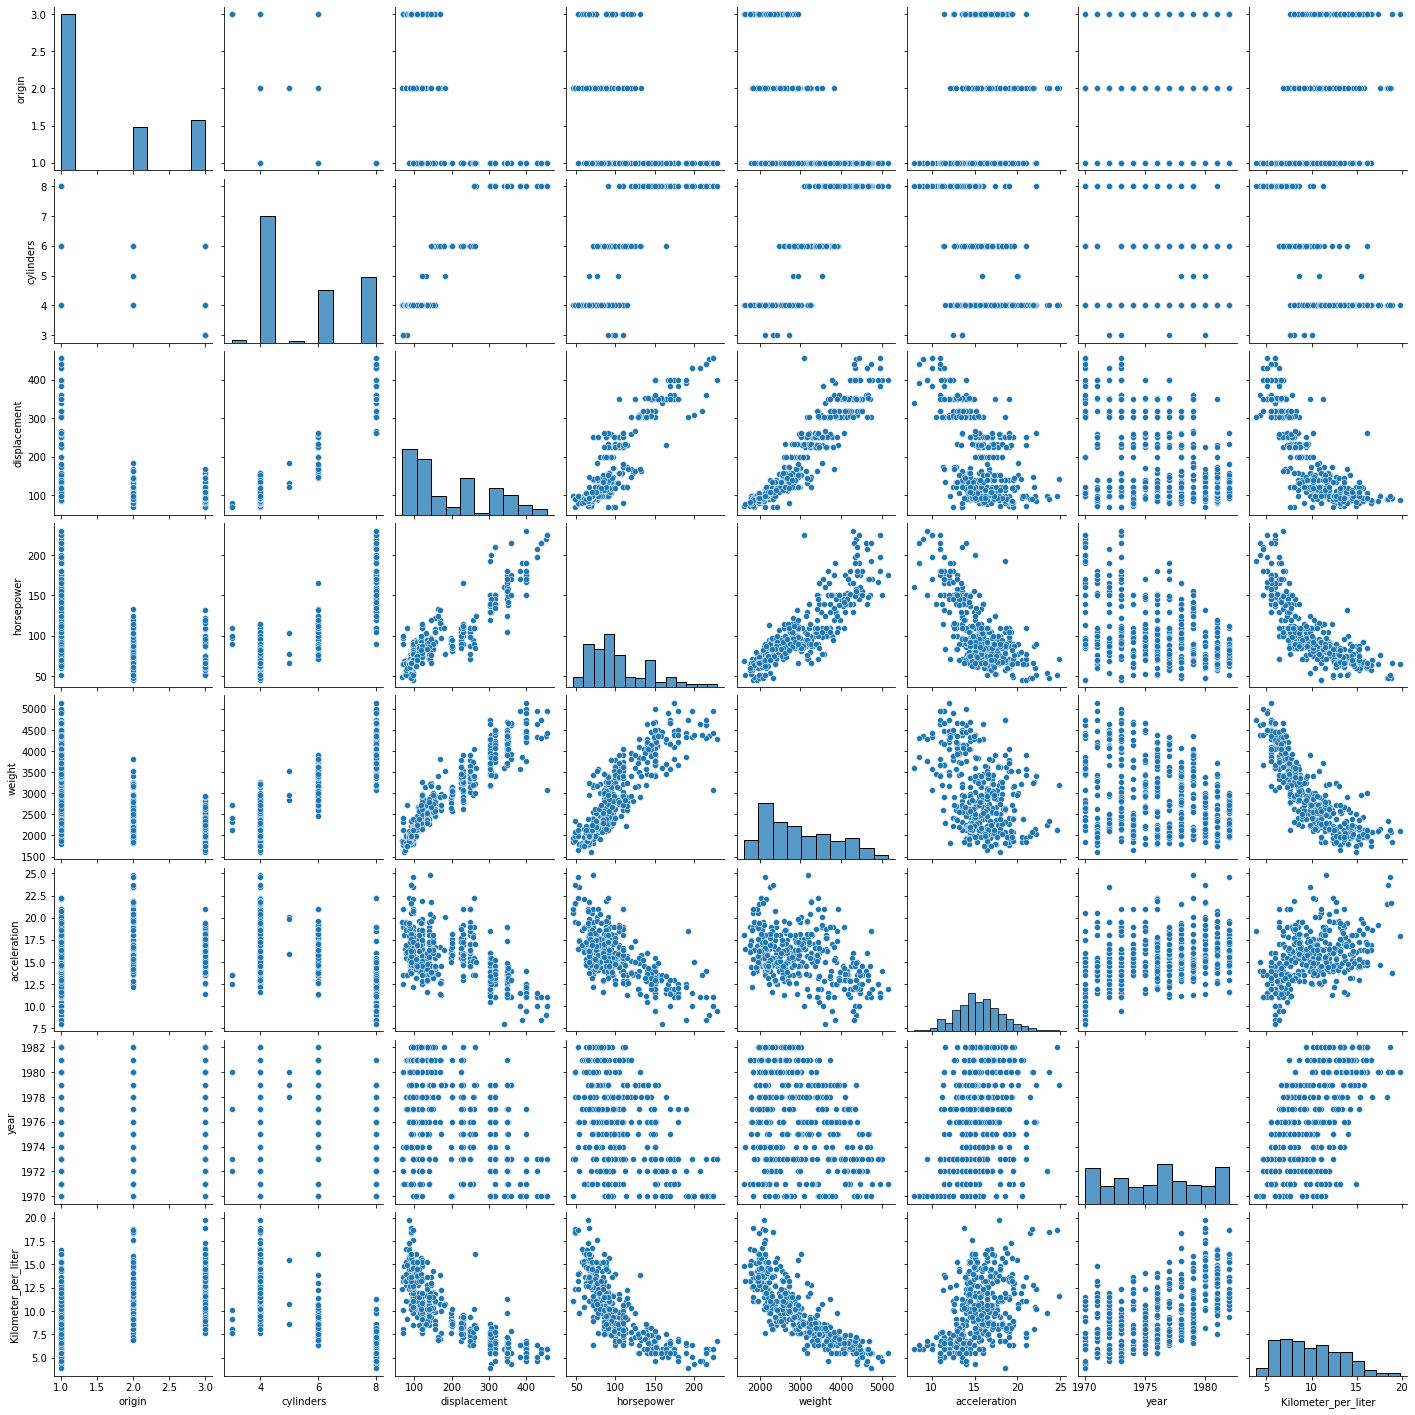

In [133]:
# ploting for good predictors including the target variable
sns.pairplot(da1)

In [134]:
# visualize the relationship between the features and responce variable
da1.drop('Kilometer_per_liter',axis=1,inplace=True)

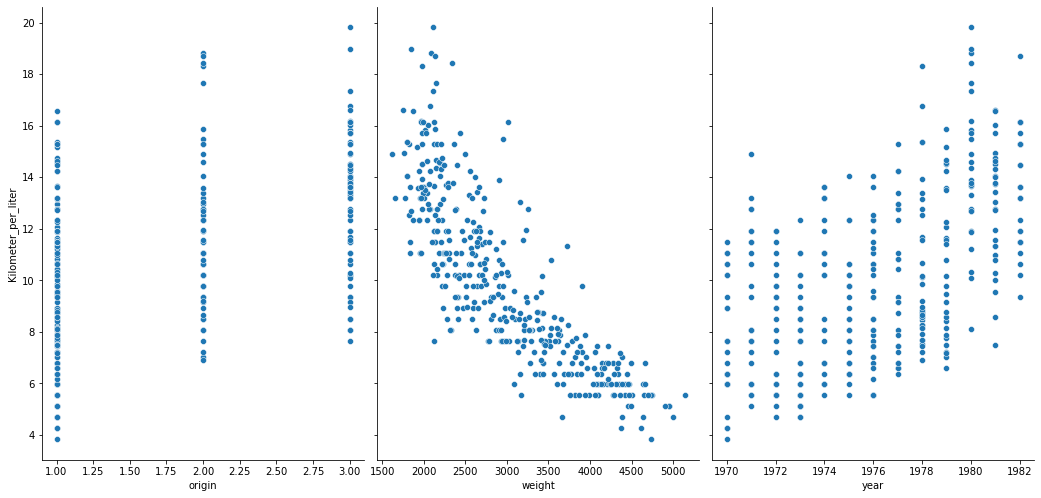

In [160]:
sns.pairplot(df,x_vars=selected_columns,y_vars='Kilometer_per_liter',size=7,aspect=0.7)

## 3. independence of observation

## make scatter plot
x=obsno
y=residuals

if their is no gemoteric pattern is visible, assumption of independence of error is holding good and not violated

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

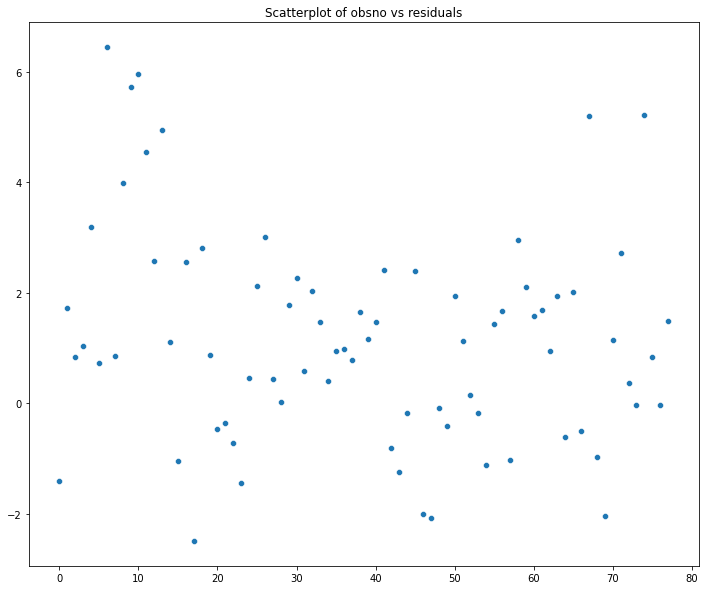

In [142]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=obsno,y=residuals)
plt.title('Scatterplot of obsno vs residuals')

# 4_Constant Error Variance [homoscadasticity]

**Make scatter plot,**

**x = predict**

**y = residuals**

**if, no geometric pattern is visible,
assumption of homoscadasticity is holding good and 
not violated**


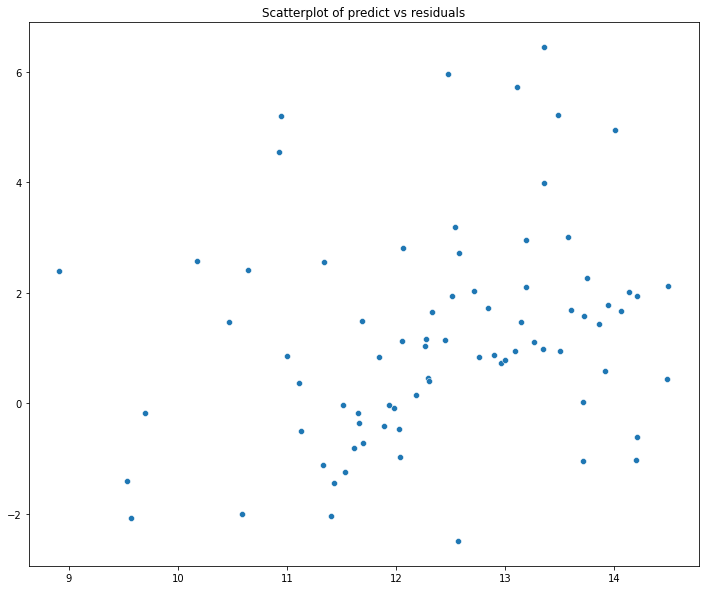

In [147]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=pred_1,y=residuals)
plt.title('Scatterplot of predict vs residuals')
plt.show()

# 5_VIF    [Variance Inflation Factor]

In [166]:
# calculating VIF for each features
# we want to take only the numerical variable to find the vif

x=selected_columns
vif_data=pd.DataFrame()
vif_data['feature']=x.columns

In [168]:
# calculating the vif for each features

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

  feature        VIF
0  origin   7.358195
1  weight  20.140247
2    year  37.647306


<AxesSubplot:>

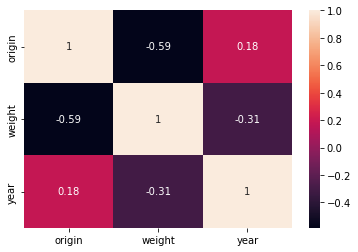

In [170]:
sns.heatmap(x.corr(),annot=True)

## 6. Durbin Watson

In [173]:
# import numpy and statsmodels for durbin watson

import numpy as np
from statsmodels.stats.stattools import durbin_watson

gfg = durbin_watson(model2.resid)


print("Durbin Watson Value :", round(gfg, 2))

Durbin Watson Value : 1.13
